In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
import seaborn as sns
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
from PIL import Image
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D, Flatten, Input, GlobalAveragePooling2D 
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, load_model, Sequential
from keras.applications.vgg16 import VGG16 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
def test(X_test, t_test):
    
    X = np.load(X_test).T
    t = np.load(t_test)
        
    dim = int(np.sqrt(X.shape[1]//3))
    
    #Resizing the test images to a size on which the training is run.
    img = []
    for i in X:
        imag = np.reshape(i, (dim, dim, 3))
        imag = Image.fromarray(imag)
        imag = imag.resize((224, 224))
        imag = np.array(imag)
        img.append(imag)
    
    X = np.array(img)
    
    # scaling the data
    X = X/255.0
    
    # Loading the model
    model = keras.models.load_model("my_model_VGG16.h5")
    print("model loaded")
    
    #Predicting the labels
    y = model.predict(X)
   
    
    acc =  accuracy_score(t , np.argmax(y, axis =1 ))
    print("Acc score: " , acc)
    
    print("Clasifcation report \n", classification_report(t , np.argmax(y, axis =1)))
    
    cf_matrix = confusion_matrix(t, np.argmax(y, axis =1 ), normalize='true')
    fig, ax = plt.subplots(figsize=(20, 10))
    sns.heatmap(cf_matrix, annot=True)
    
    pred_labels = np.argmax(y ,axis=1)
    
    return pred_labels, acc

2023-04-26 19:01:45.085579: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-26 19:01:45.589113: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 79111 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:90:00.0, compute capability: 8.0


model loaded


2023-04-26 19:01:51.929373: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8201
2023-04-26 19:01:52.892080: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Running ptxas --version returned 32512
2023-04-26 19:01:53.026643: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: ptxas exited with non-zero error code 32512, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2023-04-26 19:01:54.657349: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


Acc score:  0.965832660747915
Clasifcation report 
               precision    recall  f1-score   support

         0.0       0.96      0.95      0.95       376
         1.0       0.91      0.96      0.93       372
         2.0       0.96      0.97      0.96       372
         3.0       0.98      0.96      0.97       371
         4.0       0.98      0.98      0.98       372
         5.0       0.97      0.98      0.97       374
         6.0       0.98      0.97      0.97       365
         7.0       0.97      0.98      0.98       366
         8.0       0.99      0.98      0.98       373
         9.0       0.97      0.94      0.96       376

    accuracy                           0.97      3717
   macro avg       0.97      0.97      0.97      3717
weighted avg       0.97      0.97      0.97      3717



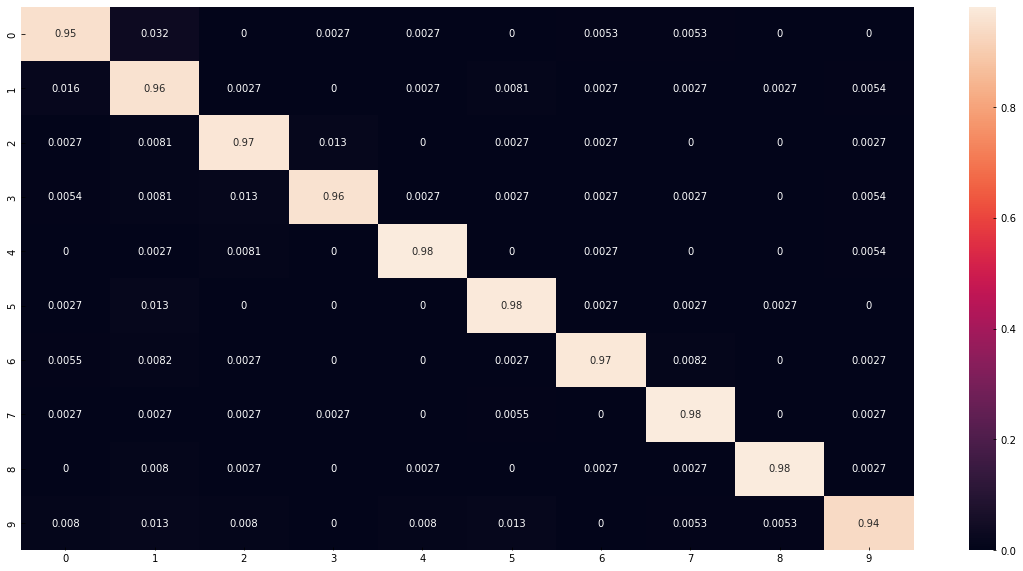

In [3]:
labels, acc = test("data_test.npy", "labels_test.npy")

In [4]:
print(acc)

0.965832660747915


In [5]:
print(labels)

[6 3 5 ... 5 6 5]
